In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import wordcloud

# Set a clean and minimalist style
sns.set_style('whitegrid')
plt.rcParams.update({'font.size': 10, 'font.family': 'sans-serif'})

# Choose a soft, muted color palette
sns.set_palette('muted')

In [4]:
all_files = [f"fetched_data/track_data_{i}" for i in range(0, 194200, 50)]
df_list = [pd.read_csv(file) for file in all_files]
df = pd.concat(df_list, ignore_index=True)
df.drop_duplicates(inplace=True, subset='uri')

In [11]:
# df.to_csv("fetched_data/uniquetracks_data.csv", index=False)

In [5]:
df.columns

Index(['artists', 'available_markets', 'disc_number', 'duration_ms',
       'explicit', 'href', 'id', 'is_local', 'name', 'popularity',
       'preview_url', 'track_number', 'type', 'uri', 'album.album_type',
       'album.artists', 'album.available_markets',
       'album.external_urls.spotify', 'album.href', 'album.id', 'album.images',
       'album.name', 'album.release_date', 'album.release_date_precision',
       'album.total_tracks', 'album.type', 'album.uri', 'external_ids.isrc',
       'external_urls.spotify'],
      dtype='object')

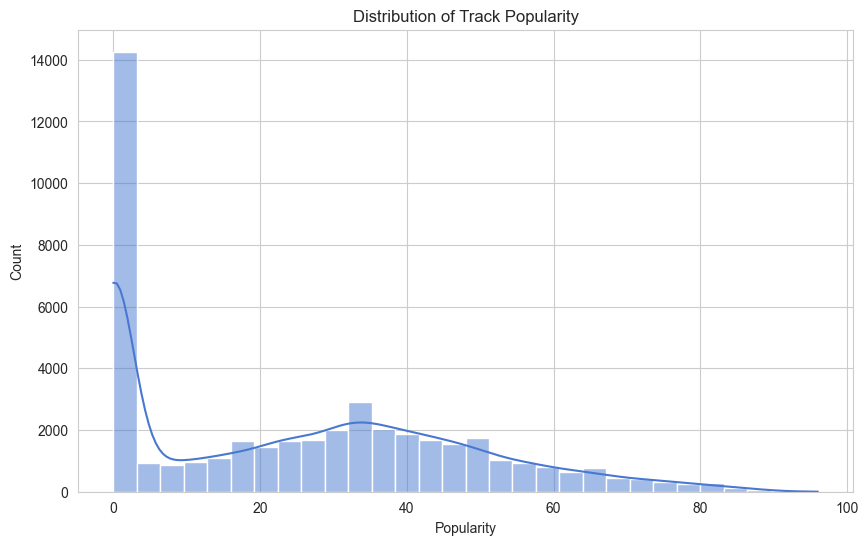

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(df['popularity'], bins=30, kde=True)
plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity')
plt.ylabel('Count')
plt.show()

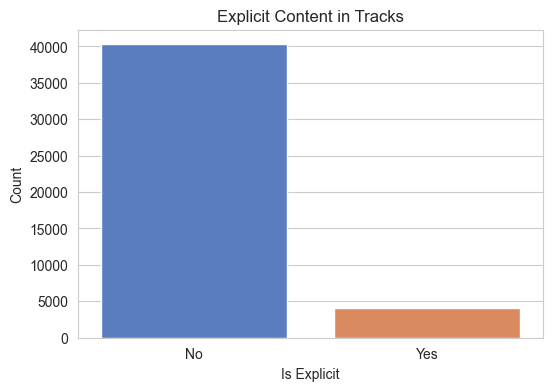

In [7]:
plt.figure(figsize=(6, 4))
sns.countplot(x='explicit', data=df)
plt.title('Explicit Content in Tracks')
plt.xlabel('Is Explicit')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

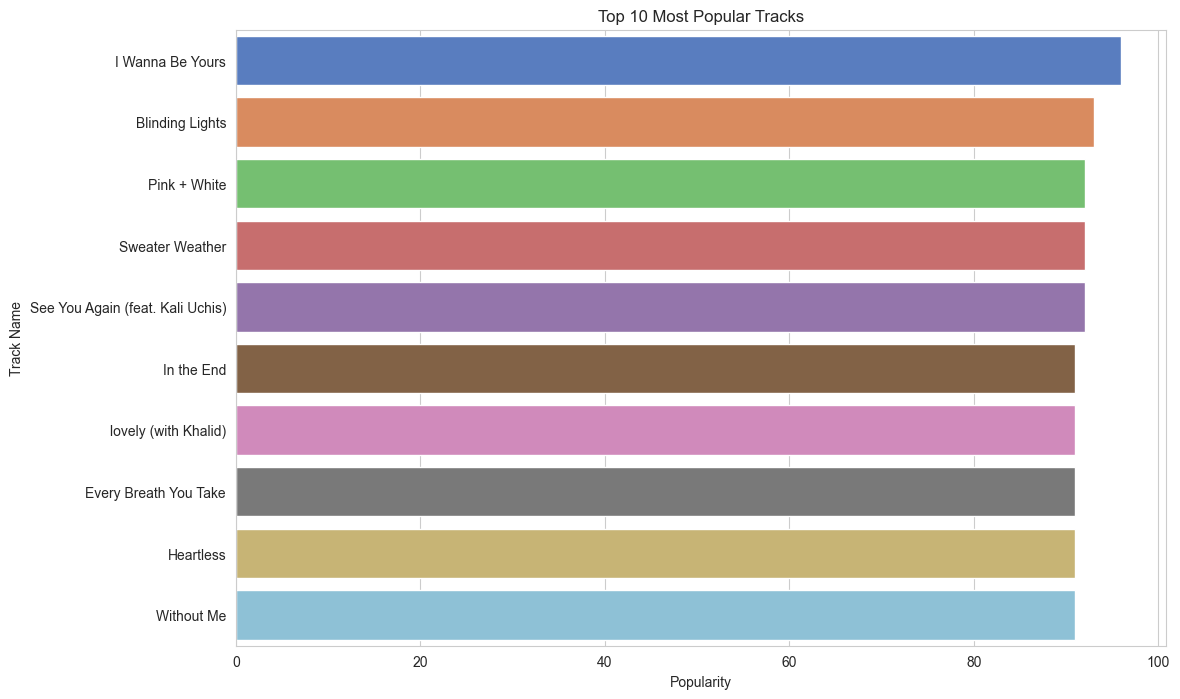

In [8]:
top_tracks = df.nlargest(10, 'popularity')
plt.figure(figsize=(12, 8))
sns.barplot(x='popularity', y='name', data=top_tracks)
plt.title('Top 10 Most Popular Tracks')
plt.xlabel('Popularity')
plt.ylabel('Track Name')
plt.show()